In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



In [4]:
df = pd.read_csv("C:/Users/A/Downloads/Iris.csv")


In [5]:
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)



In [6]:
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [8]:
X = df.drop('Species', axis=1)
y = df['Species']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [11]:
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} => Accuracy: {acc:.2f}")


K=1 => Accuracy: 0.97
K=2 => Accuracy: 1.00
K=3 => Accuracy: 1.00
K=4 => Accuracy: 1.00
K=5 => Accuracy: 1.00
K=6 => Accuracy: 1.00
K=7 => Accuracy: 1.00
K=8 => Accuracy: 1.00
K=9 => Accuracy: 1.00
K=10 => Accuracy: 1.00
K=11 => Accuracy: 1.00
K=12 => Accuracy: 1.00
K=13 => Accuracy: 1.00
K=14 => Accuracy: 1.00
K=15 => Accuracy: 1.00
K=16 => Accuracy: 1.00
K=17 => Accuracy: 1.00
K=18 => Accuracy: 0.97
K=19 => Accuracy: 0.97
K=20 => Accuracy: 0.97


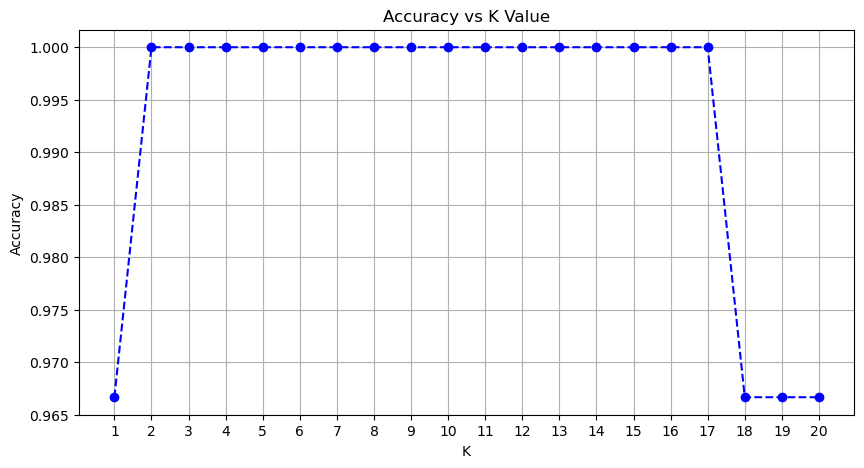

In [12]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 21), accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


In [13]:
best_k = np.argmax(accuracies) + 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print(f"\n✅ Best K found: {best_k}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))




✅ Best K found: 2
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
from matplotlib.colors import ListedColormap

In [15]:
X_vis = X_scaled[:, [0, 2]]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)



KNeighborsClassifier(n_neighbors=np.int64(2))

In [16]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



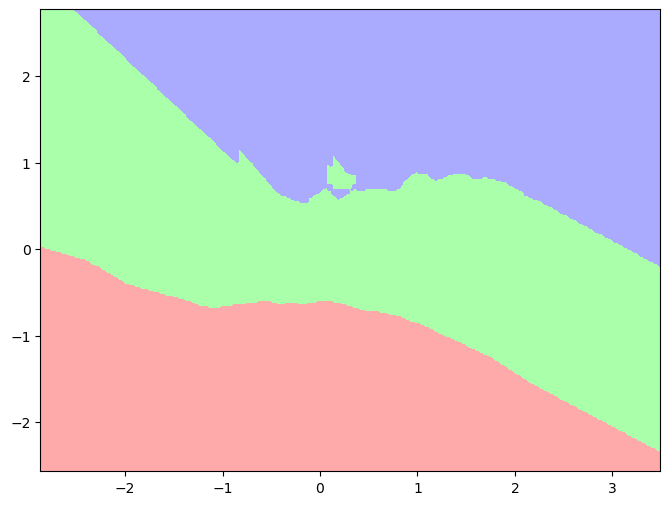

In [17]:
plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)



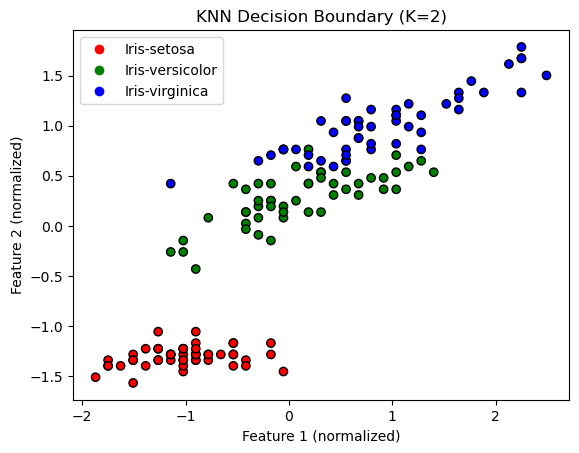

In [20]:
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.legend(handles=scatter.legend_elements()[0], labels=le.classes_.tolist())
plt.show()
